In [1]:
# -*- coding: utf-8 -*-
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from pathlib import Path

# Visualize results for scGPT & logistic regression few shot learning experiments

In [2]:
scgpt_res = pd.read_csv("finetune_results.txt", sep="\t")
scgpt_res = scgpt_res[scgpt_res.dataset_name!="dataset_name"]
scgpt_res['model'] = "scGPT"
scgpt_res.head()

,dataset_name,fraction,seed,best_epoch,accuracy,precision,recall,macro_f1,model
0,ms,0.1,1,6,0.7832640332640333,0.6342132874685196,0.6614439899764105,0.6222380693477102,scGPT
1,ms,0.1,2,4,0.8151915651915652,0.5999614870114691,0.6398667708481508,0.6123662767070885,scGPT
2,ms,0.1,3,3,0.8038313038313039,0.6229192221886285,0.6253967330701574,0.6130899715403894,scGPT
3,ms,0.1,4,5,0.814968814968815,0.6354215912045826,0.6561364038033836,0.6300023255271792,scGPT
4,ms,0.1,5,11,0.8620433620433621,0.7148875507386304,0.7035524901195351,0.6892280533054111,scGPT


In [3]:
lr_res = pd.read_csv("LR_sampleeff_results.txt", sep="\t")
lr_res['model'] = "logistic regression"
lr_res.head()

,dataset_name,fraction,seed,c,accuracy,precision,recall,macro_f1,model
0,ms,0.1,1,100.0,0.705821,0.633205,0.595561,0.591967,logistic regression
1,ms,0.1,2,1000.0,0.676492,0.630871,0.562104,0.553605,logistic regression
2,ms,0.1,3,100.0,0.661865,0.601905,0.550205,0.533369,logistic regression
3,ms,0.1,4,10.0,0.678349,0.578862,0.553705,0.544294,logistic regression
4,ms,0.1,5,1.0,0.679908,0.616483,0.563176,0.544398,logistic regression


In [4]:
all_res = pd.concat([lr_res, scgpt_res])
all_res.rename(columns={"fraction":"fraction training data"}, inplace=True)
all_res.head()

,dataset_name,fraction training data,seed,c,accuracy,precision,recall,macro_f1,model,best_epoch
0,ms,0.1,1,100.0,0.705821,0.633205,0.595561,0.591967,logistic regression,NaN
1,ms,0.1,2,1000.0,0.676492,0.630871,0.562104,0.553605,logistic regression,NaN
2,ms,0.1,3,100.0,0.661865,0.601905,0.550205,0.533369,logistic regression,NaN
3,ms,0.1,4,10.0,0.678349,0.578862,0.553705,0.544294,logistic regression,NaN
4,ms,0.1,5,1.0,0.679908,0.616483,0.563176,0.544398,logistic regression,NaN


In [5]:
all_res['fraction training data'] = all_res['fraction training data'].astype('float')
all_res['accuracy'] = all_res['accuracy'].astype('float')
all_res['precision'] = all_res['precision'].astype('float')
all_res['recall'] = all_res['recall'].astype('float')
all_res['macro_f1'] = all_res['macro_f1'].astype('float')


In [6]:
#all_res = pd.melt(all_res, value_vars=["accuracy", "macro_F1"], var_name="metric", id_vars=["dataset","seed","fraction training data", "model"])

In [7]:
def jitter(values):
    return values + np.random.normal(0,0.02,values.shape)

all_res['jit_x'] = jitter(all_res['fraction training data'])
all_res.head()

,dataset_name,fraction training data,seed,c,accuracy,precision,recall,macro_f1,model,best_epoch,jit_x
0,ms,0.1,1,100.0,0.705821,0.633205,0.595561,0.591967,logistic regression,NaN,0.102338
1,ms,0.1,2,1000.0,0.676492,0.630871,0.562104,0.553605,logistic regression,NaN,0.101299
2,ms,0.1,3,100.0,0.661865,0.601905,0.550205,0.533369,logistic regression,NaN,0.079502
3,ms,0.1,4,10.0,0.678349,0.578862,0.553705,0.544294,logistic regression,NaN,0.095404
4,ms,0.1,5,1.0,0.679908,0.616483,0.563176,0.544398,logistic regression,NaN,0.116745


# create table of results and calculate statistics

In [72]:
res_table = all_res[["dataset_name","fraction training data","model","accuracy","macro_f1"]].groupby(["dataset_name","fraction training data","model"]).mean().reset_index()
res_table = pd.pivot_table(res_table, values=["accuracy","macro_f1"], index=["dataset_name","model"], columns=["fraction training data"])
res_table.to_csv("LR_scGPT_sampleeff_comparison_table.csv")

In [74]:
res_table

accuracy                                \
fraction training data                0.10      0.25      0.50      0.75   
dataset_name model                                                         
ms           logistic regression  0.682937  0.733442  0.782581  0.801181   
             scGPT                0.820211  0.819045  0.845226  0.860573   
myeloid      logistic regression  0.607580  0.664140  0.672041  0.678280   
             scGPT                0.586676  0.611953  0.615131  0.624956   
pancreas     logistic regression  0.974798  0.972048  0.972712  0.971503   
             scGPT                0.961878  0.955311  0.962494  0.969037   

                                            macro_f1                      \
fraction training data                1.00      0.10      0.25      0.50   
dataset_name model                                                         
ms           logistic regression  0.812125  0.552251  0.577143  0.613995   
             scGPT                0.858717  0.641206  0.641786  0.684936   
myeloid      logistic regression  0.683236  0.352436  0.385398  0.376519   
             scGPT                0.627114  0.357151  0.345542  0.336939   
pancreas     logistic regression  0.973068  0.775506  0.743102  0.720749   
             scGPT                0.964580  0.659282  0.657846  0.690680   

                                                      
fraction training data                0.75      1.00  
dataset_name model                                    
ms           logistic regression  0.631561  0.641990  
             scGPT                0.710785  0.720320  
myeloid      logistic regression  0.369540  0.363593  
             scGPT                0.347039  0.340413  
pancreas     logistic regression  0.715030  0.718298  
             scGPT                0.726407  0.747759

In [8]:
#reference for calculating confidence intervals with small dataset https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module6-RandomError/PH717-Module6-RandomError11.html#:~:text=However%2C%20when%20you%20want%20to,heavily%20on%20the%20t%2Ddistribution.
def calc_95_ci_10samples(values):
    return np.std(values) / np.sqrt(len(values)) * 2.262

In [84]:
for d in ['ms','pancreas','myeloid']:
    for model in ['scGPT', 'logistic regression']:
        for f in [1]: #0.1, 0.25, 0.5, 0.75, 
            ci = calc_95_ci_10samples(all_res.loc[(all_res.dataset_name==d) & (all_res.model==model) & (all_res['fraction training data']==f),['accuracy', 'macro_f1']])
            print(f"{d} {model} {f}, confidence interval\n{ci}\n")

ms scGPT 1, confidence interval
accuracy    0.010482
macro_f1    0.022872
dtype: float64

ms logistic regression 1, confidence interval
accuracy    0.000114
macro_f1    0.000180
dtype: float64

pancreas scGPT 1, confidence interval
accuracy    0.005103
macro_f1    0.022534
dtype: float64

pancreas logistic regression 1, confidence interval
accuracy    0.000807
macro_f1    0.001857
dtype: float64

myeloid scGPT 1, confidence interval
accuracy    0.018079
macro_f1    0.008458
dtype: float64

myeloid logistic regression 1, confidence interval
accuracy    0.000214
macro_f1    0.000114
dtype: float64



#### doesn't make sense to do t-test for logistic regression with 100% of data, it's like 10x the same value, not independent

In [13]:
# t-tests
pvals = []
p_xpos = []
data_list = []
metric_list = []

for d in ['ms','pancreas','myeloid']:
    print(d)
    for f in [0.1, 0.25, 0.5, 0.75, 1]:
        print(f"{d} fraction {f}: t-test for difference in accuracy between scGPT and logistic regression")
        p = scipy.stats.ttest_ind(all_res.loc[(all_res.dataset_name==d) & (all_res.model=="scGPT") & (all_res['fraction training data']==f)].accuracy,
                                   all_res.loc[(all_res.dataset_name==d) & (all_res.model=="logistic regression") & (all_res['fraction training data']==f)].accuracy)[1]
        print(p)
        if f==1:
            pvals.append(np.nan) #bc logistic regression on 100% of training data is not indep. samples
        else:
            pvals.append(p)
        p_xpos.append(f)
        data_list.append(d)
        metric_list.append("accuracy")

    for f in [0.1, 0.25, 0.5, 0.75, 1]:
        print(f"{d} fraction {f}: t-test for difference in macro_f1 between scGPT and logistic regression")
        p = scipy.stats.ttest_ind(all_res.loc[(all_res.dataset_name==d) & (all_res.model=="scGPT") & (all_res['fraction training data']==f)].macro_f1,
                                   all_res.loc[(all_res.dataset_name==d) & (all_res.model=="logistic regression") & (all_res['fraction training data']==f)].macro_f1)[1]
        print(p)
        if f==1:
            pvals.append(np.nan) #bc logistic regression on 100% of training data is not indep. samples
        else:
            pvals.append(p)
        p_xpos.append(f)
        data_list.append(d)
        metric_list.append("f1")
    print("\n")


ms
ms fraction 0.1: t-test for difference in accuracy between scGPT and logistic regression
5.490519072789026e-11
ms fraction 0.25: t-test for difference in accuracy between scGPT and logistic regression
6.742748972115848e-08
ms fraction 0.5: t-test for difference in accuracy between scGPT and logistic regression
6.654990382240586e-09
ms fraction 0.75: t-test for difference in accuracy between scGPT and logistic regression
3.0498158051906147e-11
ms fraction 1: t-test for difference in accuracy between scGPT and logistic regression
1.839400997338493e-08
ms fraction 0.1: t-test for difference in macro_f1 between scGPT and logistic regression
3.895101942070561e-06
ms fraction 0.25: t-test for difference in macro_f1 between scGPT and logistic regression
6.0790979581804565e-06
ms fraction 0.5: t-test for difference in macro_f1 between scGPT and logistic regression
4.584378972562109e-06
ms fraction 0.75: t-test for difference in macro_f1 between scGPT and logistic regression
6.62056014153801

In [10]:
def convert_pvalue_to_asterisks(pvalue):
    if np.isnan(pvalue):
        return ""
    elif pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"

pvals_stars = [convert_pvalue_to_asterisks(p) for p in pvals]

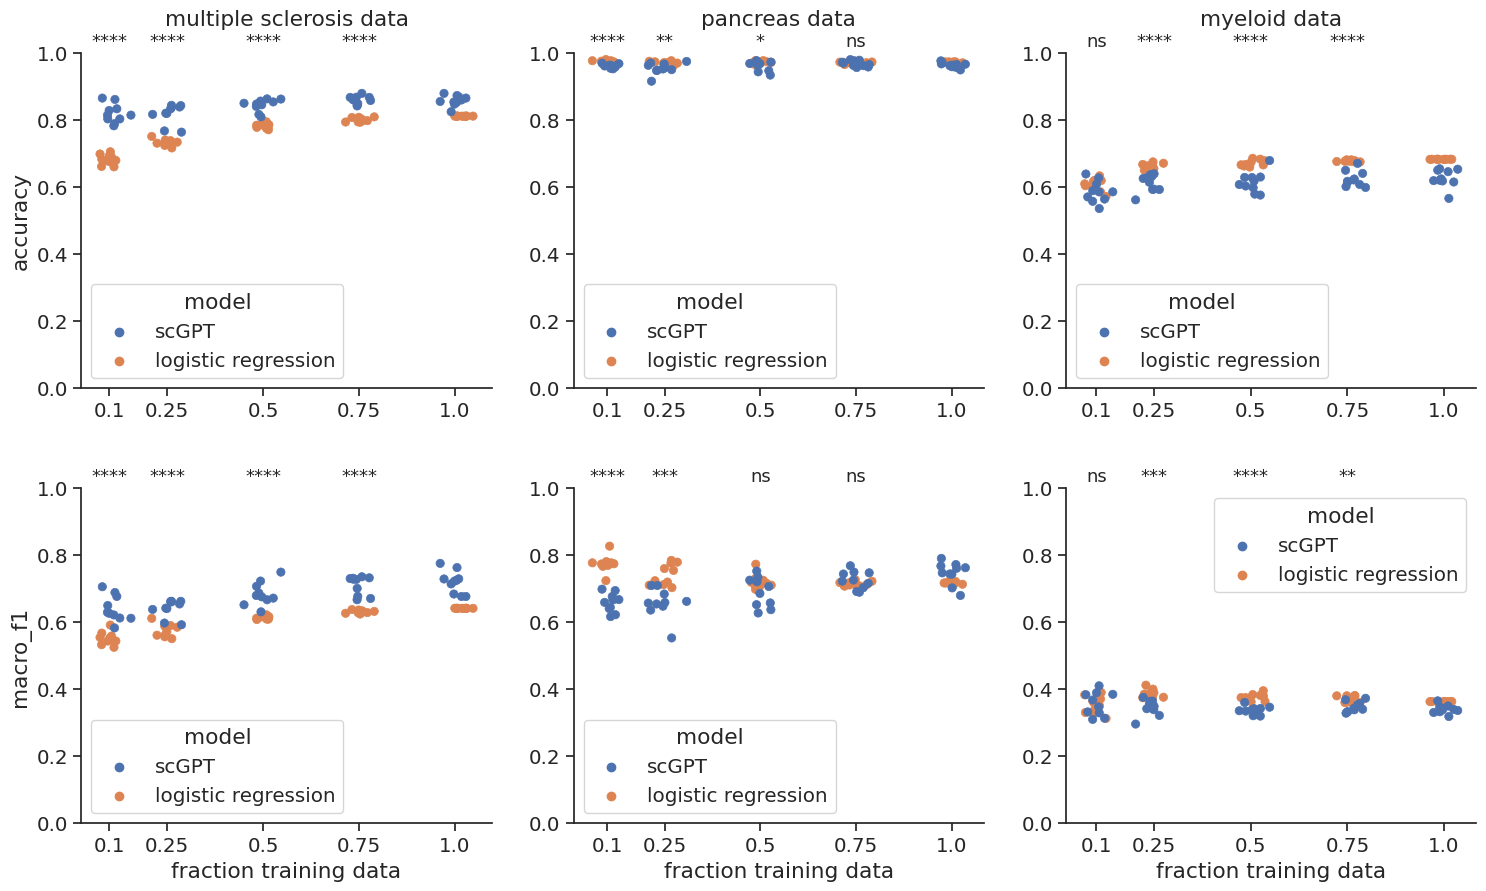

In [25]:
import seaborn as sns
sns.set(font_scale=1.3, style="ticks")
fig, axes = plt.subplots(2,3, figsize=[18,10], gridspec_kw={'hspace':0.3})
# which data is in which ax
axes_i = {'accuracy':0, 'f1':1}
axes_j = {'ms':0, 'pancreas':1, 'myeloid':2}

sns.scatterplot(data=all_res[all_res.dataset_name=="ms"], x="jit_x", y="accuracy", hue="model", ax=axes[0,0], edgecolor = None, hue_order=["scGPT","logistic regression"])
sns.scatterplot(data=all_res[all_res.dataset_name=="ms"], x="jit_x", y="macro_f1", hue="model", ax=axes[1,0], edgecolor = None, hue_order=["scGPT","logistic regression"])
sns.scatterplot(data=all_res[all_res.dataset_name=="pancreas"], x="jit_x", y="accuracy", hue="model", ax=axes[0,1], edgecolor = None, hue_order=["scGPT","logistic regression"])
sns.scatterplot(data=all_res[all_res.dataset_name=="pancreas"], x="jit_x", y="macro_f1", hue="model", ax=axes[1,1], edgecolor = None, hue_order=["scGPT","logistic regression"])
sns.scatterplot(data=all_res[all_res.dataset_name=="myeloid"], x="jit_x", y="accuracy", hue="model", ax=axes[0,2], edgecolor = None, hue_order=["scGPT","logistic regression"])
sns.scatterplot(data=all_res[all_res.dataset_name=="myeloid"], x="jit_x", y="macro_f1", hue="model", ax=axes[1,2], edgecolor = None, hue_order=["scGPT","logistic regression"])
sns.despine()
for idx in np.arange(len(pvals_stars)):
    axes[axes_i[metric_list[idx]],axes_j[data_list[idx]]].text(x=p_xpos[idx], y=1.02, s=pvals_stars[idx], fontsize="small", ha="center")
for i in np.arange(2):
    for j in np.arange(3):
        axes[i,j].set_ylim([0, 1])
        if (i == 0):
            axes[i,j].set_xlabel("")
        else:
            axes[i,j].set_xlabel("fraction training data")
        if (j == 1) | (j==2):
            axes[i,j].set_ylabel("")

        if (i==0) & (j==0):
            axes[i,j].set_title("multiple sclerosis data", pad=20)
        if (i==0) & (j==1):
            axes[i,j].set_title("pancreas data", pad=20)
        if (i==0) & (j==2):
            axes[i,j].set_title("myeloid data", pad=20)
axes[0,2].legend(loc="lower left", title="model")
plt.setp(axes, xticks=[0.1, 0.25, 0.5, 0.75, 1.0], xticklabels = [0.1, 0.25, 0.5, 0.75, 1.0]);

# Visualize results for "no-pretraining" experiments

In [83]:
scgpt_res = pd.read_csv("finetune_results.txt", sep="\t")
scgpt_res = scgpt_res[scgpt_res.dataset_name!="dataset_name"]
scgpt_res['model'] = "scGPT"
scgpt_res.head()

,dataset_name,fraction,seed,best_epoch,accuracy,precision,recall,macro_f1,model
0,ms,0.1,1,6,0.7832640332640333,0.6342132874685196,0.6614439899764105,0.6222380693477102,scGPT
1,ms,0.1,2,4,0.8151915651915652,0.5999614870114691,0.6398667708481508,0.6123662767070885,scGPT
2,ms,0.1,3,3,0.8038313038313039,0.6229192221886285,0.6253967330701574,0.6130899715403894,scGPT
3,ms,0.1,4,5,0.814968814968815,0.6354215912045826,0.6561364038033836,0.6300023255271792,scGPT
4,ms,0.1,5,11,0.8620433620433621,0.7148875507386304,0.7035524901195351,0.6892280533054111,scGPT


In [84]:
scgpt_res['fraction'] = scgpt_res['fraction'].astype('float')
scgpt_res['accuracy'] = scgpt_res['accuracy'].astype('float')
scgpt_res['precision'] = scgpt_res['precision'].astype('float')
scgpt_res['recall'] = scgpt_res['recall'].astype('float')
scgpt_res['macro_f1'] = scgpt_res['macro_f1'].astype('float')


In [85]:
scgpt_res = scgpt_res[scgpt_res.fraction==1]

In [86]:
#no pretraining, no freeze
no_pt_ms = pd.read_csv("nopretrain_finetune_results_ms.txt", sep="\t")
no_pt_ms['model'] = "scGPT (no pre-training)"

no_pt_myeloid = pd.read_csv("nopretrain_finetune_results_myeloid.txt", sep="\t")
no_pt_myeloid['model'] = "scGPT (no pre-training)"

no_pt_pancreas = pd.read_csv("nopretrain_finetune_results_pancreas.txt", sep="\t")
no_pt_pancreas['model'] = "scGPT (no pre-training)"

In [87]:
# no pretraining, freeze weights
no_pt_freeze_ms = pd.read_csv("nopretrain_finetune_results_freeze_ms.txt", sep="\t")
no_pt_freeze_ms['model'] = "scGPT (no pre-training; freeze weights)"

no_pt_freeze_myeloid = pd.read_csv("nopretrain_finetune_results_freeze_myeloid.txt", sep="\t")
no_pt_freeze_myeloid['model'] = "scGPT (no pre-training; freeze weights)"

no_pt_freeze_pancreas = pd.read_csv("nopretrain_finetune_results_freeze_pancreas.txt", sep="\t")
no_pt_freeze_pancreas['model'] = "scGPT (no pre-training; freeze weights)"


In [88]:
all_res = pd.concat([scgpt_res, no_pt_ms, no_pt_myeloid, no_pt_pancreas, no_pt_freeze_ms, no_pt_freeze_myeloid, no_pt_freeze_pancreas])


In [97]:
all_res.loc[all_res.dataset_name=="ms","dataset_name"] = "multiple sclerosis"

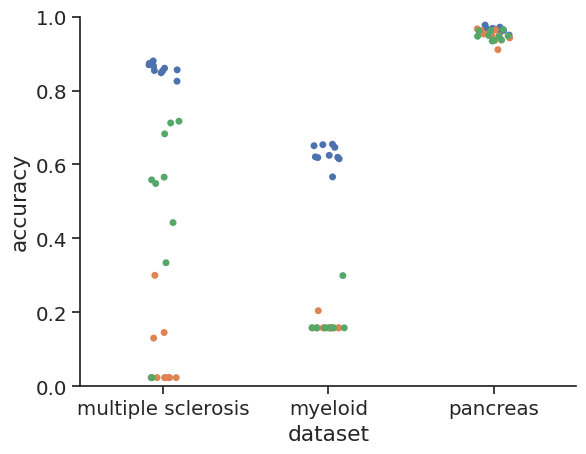

In [117]:
import seaborn as sns
sns.set(font_scale=1.3, style="ticks")
ax = sns.stripplot(data=all_res, x="dataset_name", y="accuracy", hue="model", order=None, hue_order=None, jitter=True, dodge=False, orient=None, color=None, palette=None, size=5)
sns.despine()
plt.ylim(0,1)
ax.get_legend().remove()
plt.xlabel("dataset")
#sns.move_legend(ax, "center left", bbox_to_anchor=[1,0.5])
plt.savefig("save/nopretrain_figs/acc.png", bbox_inches="tight")

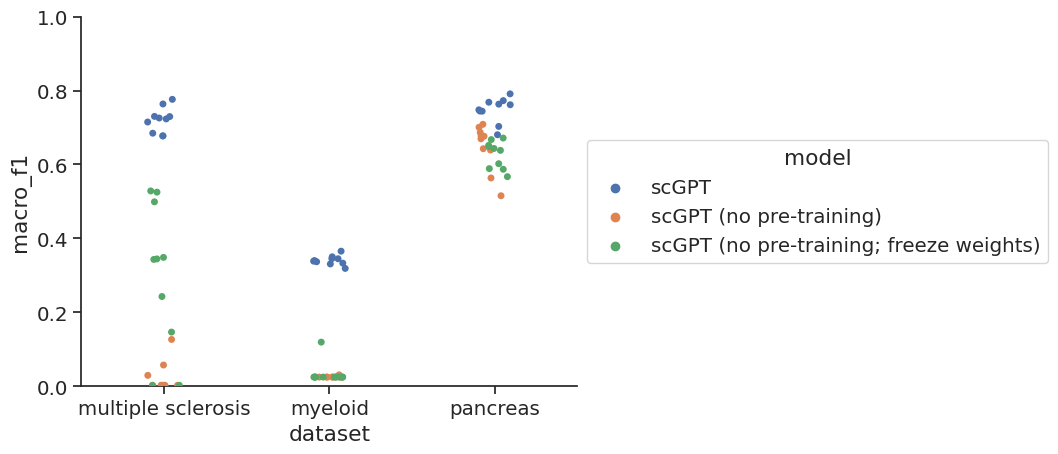

In [116]:
import seaborn as sns
sns.set(font_scale=1.3, style="ticks")
ax = sns.stripplot(data=all_res, x="dataset_name", y="macro_f1", hue="model", order=None, hue_order=None, jitter=True, dodge=False, orient=None, color=None, palette=None, size=5)
sns.despine()
plt.ylim(0,1)
sns.move_legend(ax, "center left", bbox_to_anchor=[1,0.5])
plt.xlabel("dataset")
plt.savefig("save/nopretrain_figs/f1.png", bbox_inches="tight")

In [100]:
#reference for calculating confidence intervals with small dataset https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module6-RandomError/PH717-Module6-RandomError11.html#:~:text=However%2C%20when%20you%20want%20to,heavily%20on%20the%20t%2Ddistribution.
def calc_95_ci_10samples(values):
    return np.std(values) / np.sqrt(len(values)) * 2.262

In [107]:
summary_table = all_res[['dataset_name','model','accuracy','macro_f1']].groupby(['dataset_name','model']).mean()
summary_table

accuracy  macro_f1
dataset_name       model                                                      
multiple sclerosis scGPT                                    0.858717  0.720320
                   scGPT (no pre-training)                  0.073909  0.023118
                   scGPT (no pre-training; freeze weights)  0.460870  0.298336
myeloid            scGPT                                    0.627114  0.340413
                   scGPT (no pre-training)                  0.162653  0.025414
                   scGPT (no pre-training; freeze weights)  0.172157  0.034268
pancreas           scGPT                                    0.964580  0.747759
                   scGPT (no pre-training)                  0.948862  0.647998
                   scGPT (no pre-training; freeze weights)  0.948696  0.626556

In [108]:
acc_cis = []
f1_cis = []
datasets = []
models = []
for idx in summary_table.index:
    datasets.append(idx[0])
    models.append(idx[1])
    acc_cis.append(calc_95_ci_10samples(all_res.loc[(all_res.dataset_name==idx[0]) & (all_res.model==idx[1]),['accuracy']]).values[0])
    f1_cis.append(calc_95_ci_10samples(all_res.loc[(all_res.dataset_name==idx[0]) & (all_res.model==idx[1]),['macro_f1']]).values[0])


In [109]:
summary_table['acc_cis'] = acc_cis
summary_table['f1_cis'] = f1_cis

In [110]:
summary_table = np.round(summary_table, 3)
summary_table = summary_table.astype('str')
summary_table['accuracy'] = summary_table['accuracy'] + " " + u"\u00B1" + " " + summary_table['acc_cis']
summary_table['macro_f1'] = summary_table['macro_f1'] + " " + u"\u00B1" + " " + summary_table['f1_cis']

In [111]:
summary_table

accuracy  \
dataset_name       model                                                    
multiple sclerosis scGPT                                     0.859 ± 0.01   
                   scGPT (no pre-training)                  0.074 ± 0.063   
                   scGPT (no pre-training; freeze weights)  0.461 ± 0.176   
myeloid            scGPT                                    0.627 ± 0.018   
                   scGPT (no pre-training)                   0.163 ± 0.01   
                   scGPT (no pre-training; freeze weights)   0.172 ± 0.03   
pancreas           scGPT                                    0.965 ± 0.005   
                   scGPT (no pre-training)                  0.949 ± 0.011   
                   scGPT (no pre-training; freeze weights)  0.949 ± 0.008   

                                                                 macro_f1  \
dataset_name       model                                                    
multiple sclerosis scGPT                                     0.72 ± 0.023   
                   scGPT (no pre-training)                  0.023 ± 0.028   
                   scGPT (no pre-training; freeze weights)  0.298 ± 0.134   
myeloid            scGPT                                     0.34 ± 0.008   
                   scGPT (no pre-training)                  0.025 ± 0.001   
                   scGPT (no pre-training; freeze weights)   0.034 ± 0.02   
pancreas           scGPT                                    0.748 ± 0.023   
                   scGPT (no pre-training)                  0.648 ± 0.042   
                   scGPT (no pre-training; freeze weights)  0.627 ± 0.025   

                                                           acc_cis f1_cis  
dataset_name       model                                                   
multiple sclerosis scGPT                                      0.01  0.023  
                   scGPT (no pre-training)                   0.063  0.028  
                   scGPT (no pre-training; freeze weights)   0.176  0.134  
myeloid            scGPT                                     0.018  0.008  
                   scGPT (no pre-training)                    0.01  0.001  
                   scGPT (no pre-training; freeze weights)    0.03   0.02  
pancreas           scGPT                                     0.005  0.023  
                   scGPT (no pre-training)                   0.011  0.042  
                   scGPT (no pre-training; freeze weights)   0.008  0.025

In [112]:
print(summary_table[["accuracy","macro_f1"]].to_latex())

\begin{tabular}{llll}
\toprule
         &                                         &       accuracy &       macro\_f1 \\
dataset\_name & model &                &                \\
\midrule
multiple sclerosis & scGPT &   0.859 ± 0.01 &   0.72 ± 0.023 \\
         & scGPT (no pre-training) &  0.074 ± 0.063 &  0.023 ± 0.028 \\
         & scGPT (no pre-training; freeze weights) &  0.461 ± 0.176 &  0.298 ± 0.134 \\
myeloid & scGPT &  0.627 ± 0.018 &   0.34 ± 0.008 \\
         & scGPT (no pre-training) &   0.163 ± 0.01 &  0.025 ± 0.001 \\
         & scGPT (no pre-training; freeze weights) &   0.172 ± 0.03 &   0.034 ± 0.02 \\
pancreas & scGPT &  0.965 ± 0.005 &  0.748 ± 0.023 \\
         & scGPT (no pre-training) &  0.949 ± 0.011 &  0.648 ± 0.042 \\
         & scGPT (no pre-training; freeze weights) &  0.949 ± 0.008 &  0.627 ± 0.025 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_1423342/3502987035.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(summary_table[["accuracy","macro_f1"]].to_latex())
